In [1]:
#import tools

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import  KMeans
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
#load data
datasets = pd.read_csv('../datasets/stackHeight_setDim.csv',encoding='ansi')
datasets.shape

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/stackHeight_setDim.csv'

In [ ]:
#show data
datasets.head()

,Barcode,Barcode_base,Set_Dimension_Stack,FlyHeight
0,CCBRB100860536PCM7222H4A0PMPPP00MP0PP000000,1321421110633890,-0.549,5.53
1,CCBSZ100860536PCM7222H4A0PMPPP00MP0PP000000,2618021100733600,-0.551,6.18
2,CCBSQ100860536PCM7222H4A0PMPPP00MP0PP000000,1720021103130300,-0.598,5.08
3,CCBSV100860536PCM7222H4A0PMPPP00MP0PP000000,9620421091332890,-0.512,5.48
4,CCBTX100860536PCM7222H4A0PMPPP00MP0PP000000,9320321101930050,-0.479,6.27


In [ ]:
datasets.describe()

,Barcode_base,Set_Dimension_Stack,FlyHeight
count,2.062300e+04,20623.000000,20623.000000
mean,4.067288e+15,-0.515435,6.077544
std,3.394374e+15,0.037999,0.557081
min,1.568210e+14,-0.651000,3.040000
25%,1.820421e+15,-0.539000,5.730000
50%,2.321821e+15,-0.513000,6.110000
75%,9.123121e+15,-0.489000,6.440000
max,9.925421e+15,-0.163000,9.680000


In [ ]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20623 entries, 0 to 20622
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Barcode              20623 non-null  object 
 1   Barcode_base         20623 non-null  int64  
 2   Set_Dimension_Stack  20623 non-null  float64
 3   FlyHeight            20623 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 644.6+ KB


In [ ]:
datasets.isnull().sum()

Barcode                0
Barcode_base           0
Set_Dimension_Stack    0
FlyHeight              0
dtype: int64

C:\Users\bpt3542\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bpt3542\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


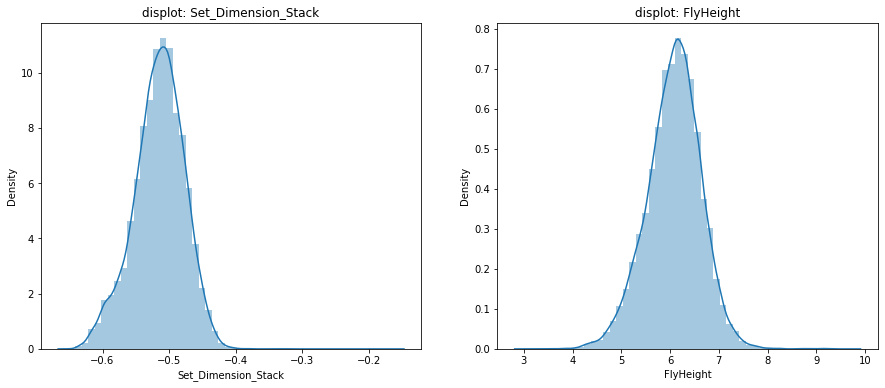

In [ ]:
#Visualization
plt.figure(1,figsize=(15,6))
n=0
for x in ['Set_Dimension_Stack','FlyHeight']:
    n += 1
    plt.subplot(1,2,n)
    sns.distplot(datasets[x])
    plt.title(f'displot: {x}')



C:\Users\bpt3542\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


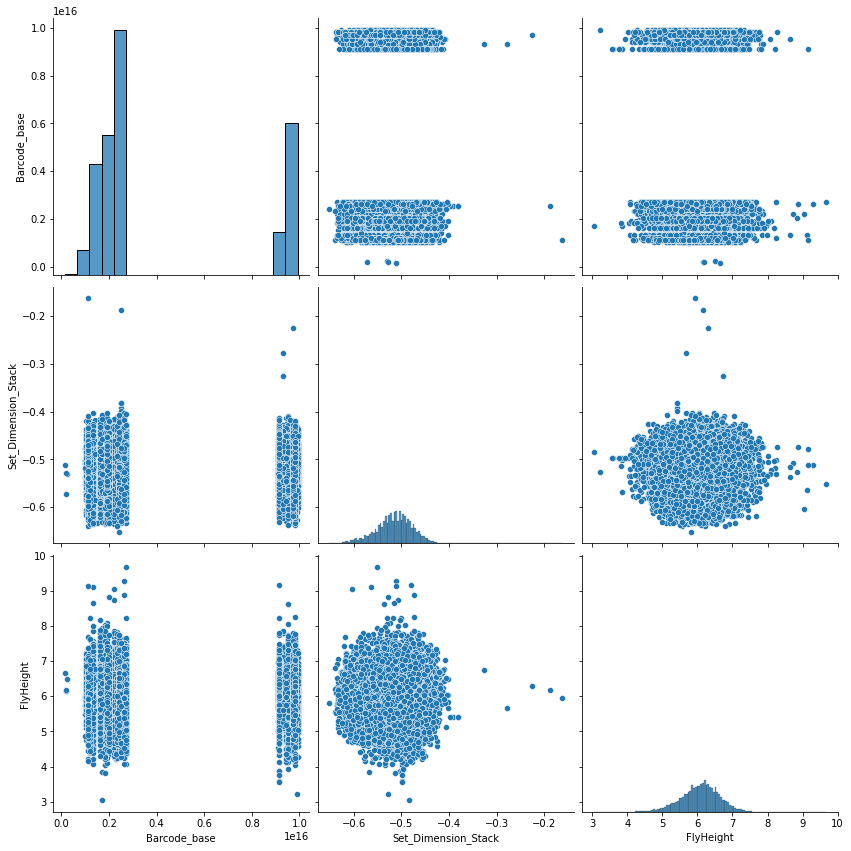

In [ ]:
sns.pairplot(datasets,size = 4)

<AxesSubplot:>

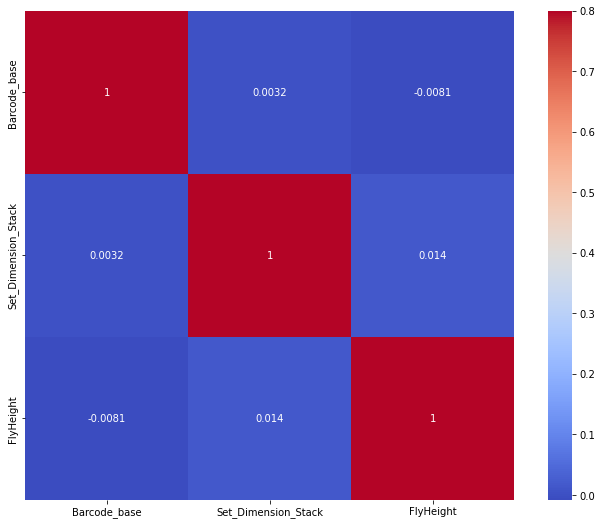

In [ ]:
datasets_corr = datasets.drop("Barcode",axis=1)

corrmat = datasets_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='coolwarm',annot=True)


In [ ]:
from sklearn.model_selection import train_test_split
X = datasets.drop(['FlyHeight','Barcode'],axis=1) # Independet variable

y = datasets['FlyHeight'] # dependent variable

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20623 entries, 0 to 20622
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Barcode_base         20623 non-null  int64  
 1   Set_Dimension_Stack  20623 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 322.4 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15467 entries, 20615 to 2732
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Barcode_base         15467 non-null  int64  
 1   Set_Dimension_Stack  15467 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 362.5 KB
None


In [ ]:
lr = LinearRegression()
lr.fit(X_train.dropna(),y_train.dropna())

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train.dropna())
y_test_pred = lr.predict(X_test.dropna())
print(lr.score(X_test.dropna(),y_test.dropna()))

9.318921620471432e-05


In [ ]:
#train only Axial play 

from sklearn.model_selection import train_test_split
X = datasets['Axial_Play']

y = datasets['FlyHeight'] # dependent variable


KeyError: 'Axial_Play'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

print(X_train.dropna()) #dropna คือลบ nan (null) 

12269    13.60
3326     14.29
8229     13.90
1357     13.90
13111    13.80
         ...  
9225     14.10
13123    13.30
9845     14.60
10799    14.10
2732     13.90
Name: Axial_Play, Length: 10543, dtype: float64


In [1]:
#plot data
plt.scatter(X.dropna(),y.dropna())

NameError: name 'plt' is not defined

In [ ]:
lr = LinearRegression()
lr.fit(X_train.dropna().values.reshape(-1,1) ,y_train.dropna()) #replace เป็น numpy

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train.dropna().values.reshape(-1,1))
y_test_pred = lr.predict(X_test.dropna().values.reshape(-1,1))
print(lr.score(X_test.dropna().values.reshape(-1,1),y_test.dropna()))

0.15059020142181134
